#  <a id='71'>Credit Risk Analysis Modelling with Feature Selection Method</a>

# Table of Contents
1. [Business Undestanding](#intro)
2. [Data Understanding](#data)

    2.1 [Load Data](#load)  
    2.2 [Target Variable](#target)  
    2.3 [Missing Value](#missing) 
    

3. [Data Preparation](#data_preparation)

    3.1 [Fill Missing Value](#fill)  
    3.2 [Transformation](#transformation)
    
4. [Modelling](#modelling)  
5. [Evaluation](#evaluation) 
6. [Deployment](#deployment) 


Additionally: 
[MyGitHub](https://github.com/rosamendrofa/Proyek-Penambangan-Data)

##  <a id='71'>1. Business Understanding</a>
<a id="intro"></a>
<strong id='41'> Motivation </strong>
- Lending club adalah salah satu platform P2P Lending yang mempertemukan peminjam dan investor. Prosedur peminjaman dilakukan melalui pengisian data diri nasabah melalui aplikasi lending club  kemudian,  nasabah yang mengajukan pinjaman menunggu pemberitahuan pendanaan dari investor. 
- Seorang Investor ingin menginvestasikan uangnya melalui aplikasi lending club kepada salah satu peminjam.  Banyaknya aplikasi pengajuan pinjaman, membuat investor kesulitan memilih peminjamnya, karena tidak ada karakteristik yang membedakan setiap peminjam. Investor tersebut ingin mengidentifikasikan aplikasi pinjaman siapa yang perlu didanai dan tidak berisiko gagal bayar kepada pihak perusahaan lending club . 
- Oleh karena itu metode penambangan data dapat digunakan untuk menilai risiko kredit nasabah dan mengklasifikasikannya dalam kategori nasabah yang buruk dan nasabah yang baik berdasarkan data peminjaman.

<strong id='41'> Objectives </strong>
- Untuk mengidentifikasi peminjam yang layak diberikan pinjaman tanpa resiko kegagalan pembayaran.
- Untuk mengidentifikasikan atribut yang mempengaruhi risiko kredit.



##  <a id='71'>2. Data Understanding</a>
<a id="data"></a>

Pada tahap ini dilakukan pengumpulan data dari website Kaggle, dan memahami data menggunakan pendekatan Exploratory Data Analysis (EDA). Proses EDA dilakukan dengan memeriksa nilai outlier dalam dataset. 

### a. Load Data
<a id="load"></a>

In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
data_train = pd.read_csv('/content/drive/My Drive/TA_01/Dataset/data_train_loans.csv', delimiter=',', index_col=0)
data_test = pd.read_csv('/content/drive/My Drive/TA_01/Dataset/data_test_loans.csv', delimiter=',', index_col=0)

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


### b. Drop Target variable from data test
<a id="target"></a>

In [0]:
data_test.drop( data_test[ data_test['loan_status'] == 'Current' ].index , inplace=True)

In [0]:
data_test = data_test.drop(['loan_status'], axis=1)

In [0]:
data_train['loan_status'] = data_train['loan_status'].replace(['Fully Paid','Does not meet the credit policy. Status:Fully Paid'], 'Fully Paid')
data_train['loan_status'] = data_train['loan_status'].replace(['Charged Off','In Grace Period', 'Default','Does not meet the credit policy. Status:Charged Off','Late (31-120 days)','Late (16-30 days)','Issued'], 'Charged Off')

In [0]:
data_train.drop( data_train[ data_train['loan_status'] == 'Current' ].index , inplace=True)

### c. Kalkulasi missing value
<a id="missing"></a>

In [0]:
# Define a function to visulize the features with missing values, and % of total values, & datatype
def missing_values_table(df):
     # Total missing values
    mis_val = df.isnull().sum()
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_type = df.dtypes
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_type], axis=1)
        
     # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'type'})
        
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[ mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        
    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n" "There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")
        
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [97]:
missing_values_table(data_train)

Your selected dataframe has 52 columns.
There are 19 columns that have missing values.


,Missing Values,% of Total Values,type
total_rev_hi_lim,52091,9.5,float64
tot_cur_bal,52091,9.5,float64
tot_coll_amt,52091,9.5,float64
emp_title,32969,6.0,object
emp_length,28444,5.2,object
title,9158,1.7,object
last_pymnt_d,6228,1.1,object
revol_util,371,0.1,float64
collections_12_mths_ex_med,109,0.0,float64
dti,31,0.0,float64


##  <a id='71'>3. Data Preparation</a>
<a id="data_preparation"></a>

Tahap ini melakukan data preprocessing, salah satu teknik yang digunakan adalah data cleaning dengan ffill, bfilll dan filna. Apabila jumlah NaN lebih besar dari 20 persen maka akan di remove

### a. Fill missing value with ffill 
<a id="fill"></a>
- emp_title
- emp_length
- title

In [0]:
data_train['emp_title'] = data_train['emp_title'].fillna(method='ffill').fillna(method='bfill')
data_train['emp_length'] = data_train['emp_length'].fillna(method='ffill').fillna(method='bfill')
data_train['title'] = data_train['title'].fillna(method='ffill').fillna(method='bfill')


### b. Fill missing value with bfill 
- emp_title
- emp_length
- title

In [0]:
data_test['emp_title'] = data_test['emp_title'].fillna(method='ffill').fillna(method='bfill')
data_test['emp_length'] = data_test['emp_length'].fillna(method='ffill').fillna(method='bfill')
data_test['title'] = data_test['title'].fillna(method='ffill').fillna(method='bfill')

Fill missing value tot_cur_bal with loan_amnt value

In [0]:
data_train['tot_cur_bal'] = data_train['tot_cur_bal'].fillna(data_train['loan_amnt'])

In [0]:
data_test['tot_cur_bal'] = data_test['tot_cur_bal'].fillna(data_test['loan_amnt'])

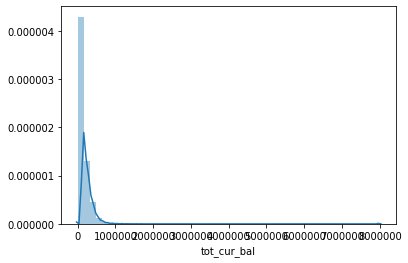

In [102]:
import seaborn
seaborn.distplot(data_train.tot_cur_bal)

In [0]:
data_train['loan_freq'] = data_train.groupby('id')['id'].transform('count')

In [0]:
data_test['loan_freq'] = data_test.groupby('id')['id'].transform('count')

In [0]:
data_train =  data_train.drop(['id'], axis=1)

In [0]:
data_test =  data_test.drop(['id'], axis=1)

### c. Drop attribute
['tot_coll_amt','total_rev_hi_lim','addr_state','acc_now_delinq','collections_12_mths_ex_med','delinq_2yrs','policy_code','zip_code','collection_recovery_fee','pub_rec','out_prncp_inv','funded_amnt_inv','total_rec_late_fee','recoveries']

In [0]:
data_train = data_train.drop(['tot_coll_amt','total_rev_hi_lim','addr_state','acc_now_delinq','collections_12_mths_ex_med','delinq_2yrs','policy_code','zip_code','collection_recovery_fee','pub_rec','out_prncp_inv','funded_amnt_inv','total_rec_late_fee','recoveries'], axis=1)

In [0]:
data_test = data_test.drop(['tot_coll_amt','total_rev_hi_lim','addr_state','acc_now_delinq','collections_12_mths_ex_med','delinq_2yrs','policy_code','zip_code','collection_recovery_fee','pub_rec','out_prncp_inv','funded_amnt_inv','total_rec_late_fee','recoveries'], axis=1)

### d. Identify numerical variable, categorical and date variable

In [0]:
num_attr = ['dti','inq_last_6mths','installment',
            'int_rate','loan_amnt','open_acc',
            'out_prncp','revol_bal','annual_inc',
            'revol_util','tot_cur_bal','total_acc',
            'total_pymnt','total_pymnt_inv',
            'total_rec_int','total_rec_prncp','funded_amnt']
     
cat_attr = ['application_type','emp_length','emp_title','grade','home_ownership','initial_list_status','loan_status',
            'purpose','pymnt_plan','sub_grade','term','title','verification_status','state_code','state']
date_attr =['earliest_cr_line','issue_d','last_credit_pull_d','last_pymnt_d']

In [110]:
data_train[num_attr].describe().T

,count,mean,std,min,25%,50%,75%,max
dti,548712.0,17.937297,25.207251,0.00,11.580000,17.36,23.640000,9.999000e+03
inq_last_6mths,548724.0,0.752958,1.036511,0.00,0.000000,0.00,1.000000,3.300000e+01
installment,548743.0,440.088263,261.429787,15.69,250.370000,378.20,581.580000,1.719830e+03
int_rate,548743.0,13.865404,4.782746,5.32,10.640000,13.44,16.990000,3.099000e+01
loan_amnt,548743.0,14361.250394,8617.242877,500.00,8000.000000,12000.00,20000.000000,4.000000e+04
open_acc,548725.0,11.514577,5.348961,0.00,8.000000,11.00,14.000000,9.000000e+01
out_prncp,548743.0,1124.556723,4270.133817,0.00,0.000000,0.00,0.000000,4.000000e+04
revol_bal,548743.0,15944.289294,21931.299263,0.00,5860.000000,11004.00,19505.000000,2.568995e+06
annual_inc,548741.0,75543.880378,61843.559477,0.00,46000.000000,65000.00,90000.000000,9.550000e+06
revol_util,548372.0,52.464149,24.649234,0.00,34.100000,53.10,71.700000,3.666000e+02


In [111]:
data_train[num_attr]

,dti,inq_last_6mths,installment,int_rate,loan_amnt,open_acc,out_prncp,revol_bal,annual_inc,revol_util,tot_cur_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_prncp,funded_amnt
1009128,7.68,0.0,660.28,24.99,22500.0,7.0,18903.54,10720.0,45000.0,27.8,70279.0,17.0,10926.910000,10926.91,7297.44,3596.46,22500.0
235393,3.04,2.0,337.47,13.11,10000.0,7.0,0.00,545.0,30000.0,4.3,10000.0,14.0,8928.000000,8928.00,1914.44,6513.67,10000.0
1339142,12.75,0.0,270.98,9.17,8500.0,20.0,0.00,6609.0,48000.0,28.9,98451.0,32.0,4194.530000,4194.53,308.91,1045.99,8500.0
1088061,29.17,1.0,340.13,13.66,10000.0,14.0,0.00,8316.0,49000.0,59.4,136172.0,29.0,11433.320000,11433.32,1433.32,10000.00,10000.0
1267242,18.41,2.0,409.67,10.75,18950.0,10.0,0.00,18185.0,80000.0,94.2,172958.0,27.0,20824.801771,20824.80,1874.80,18950.00,18950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026119,21.91,0.0,189.44,7.39,6100.0,7.0,0.00,4214.0,70000.0,49.0,163390.0,28.0,6606.420330,6606.42,506.42,6100.00,6100.0
889660,29.47,0.0,125.02,13.67,3675.0,10.0,0.00,29482.0,45000.0,86.2,190385.0,21.0,4505.798935,4505.80,830.80,3675.00,3675.0
1686702,31.41,0.0,199.63,12.12,6000.0,17.0,0.00,19016.0,52000.0,68.4,69232.0,31.0,7186.676549,7186.68,1186.68,6000.00,6000.0
339192,11.31,0.0,632.87,11.47,19200.0,4.0,0.00,9419.0,110000.0,94.2,387255.0,17.0,20866.285869,20866.29,1666.29,19200.00,19200.0


In [112]:
data_train[cat_attr]

,application_type,emp_length,emp_title,grade,home_ownership,initial_list_status,loan_status,purpose,pymnt_plan,sub_grade,term,title,verification_status,state_code,state
1009128,Individual,8 years,Producer,E,MORTGAGE,f,Charged Off,small_business,y,E5,60 months,Business,Source Verified,FL,Florida
235393,INDIVIDUAL,8 years,Producer,B,OWN,f,Charged Off,debt_consolidation,n,B4,36 months,loan,Not Verified,CA,California
1339142,INDIVIDUAL,1 year,Inventory Manager,B,RENT,w,Charged Off,debt_consolidation,n,B1,36 months,Debt consolidation,Not Verified,NJ,NewJersey
1088061,INDIVIDUAL,8 years,Machine operator,C,MORTGAGE,w,Fully Paid,other,n,C3,36 months,Other,Not Verified,NY,NewYork
1267242,Individual,10+ years,Contract Sales Manager,B,RENT,w,Fully Paid,debt_consolidation,n,B4,60 months,Debt consolidation,Verified,PA,Pennsylvania
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026119,Individual,10+ years,Admin. Assistant,A,MORTGAGE,w,Fully Paid,debt_consolidation,n,A4,36 months,Debt consolidation,Source Verified,TN,Tennessee
889660,INDIVIDUAL,10+ years,Insurance Agency,B,MORTGAGE,f,Fully Paid,debt_consolidation,n,B5,36 months,pay off debt,Verified,FL,Florida
1686702,INDIVIDUAL,< 1 year,Jefferson Center for Mental Health,B,OWN,f,Fully Paid,credit_card,n,B3,36 months,Credit card refinancing,Verified,CO,Colorado
339192,INDIVIDUAL,10+ years,Senior Information Systems Analyst,B,MORTGAGE,w,Fully Paid,debt_consolidation,n,B5,36 months,Debt consolidation,Source Verified,CA,California


In [113]:
data_train[date_attr]

,earliest_cr_line,issue_d,last_credit_pull_d,last_pymnt_d
1009128,Aug-2004,Jun-2016,Dec-2017,Dec-2017
235393,Dec-1996,Aug-2012,Oct-2016,Sep-2014
1339142,Sep-2007,Oct-2014,Jan-2017,Mar-2015
1088061,Feb-1998,Nov-2014,Sep-2016,Feb-2016
1267242,Dec-1996,Apr-2016,Apr-2017,Mar-2017
...,...,...,...,...
2026119,Sep-1994,Mar-2016,Sep-2017,Sep-2017
889660,May-1995,Oct-2013,Oct-2016,Oct-2016
1686702,Feb-1988,Oct-2012,Oct-2015,Nov-2015
339192,Jan-2000,Mar-2016,Jan-2017,Jan-2017


### e. Fill missing value with mean

In [0]:
import numpy as np
imputer_mean_columns = ['annual_inc']

for col in imputer_mean_columns:
    data_train[col]= data_train[col].replace(0,np.NaN)
    mean = int(data_train[col].mean(skipna=True))
    data_train[col] = data_train[col].replace(np.NaN,mean)

### f. Fill missing value dti variable

In [0]:
data_train['dti'] = data_train['dti'].fillna(data_train['funded_amnt']+data_train['total_rec_int']/data_train['annual_inc']/12)

In [0]:
data_test['dti'] = data_test['dti'].fillna(data_test['funded_amnt']+data_test['total_rec_int']/data_test['annual_inc']/12)

In [29]:
data_train.isnull().sum()

annual_inc                0
application_type          0
dti                       0
earliest_cr_line         18
emp_length                0
emp_title                 0
funded_amnt               0
grade                     0
home_ownership            0
initial_list_status       0
inq_last_6mths           19
installment               0
int_rate                  0
issue_d                   0
last_credit_pull_d       25
last_pymnt_amnt           0
last_pymnt_d           6228
loan_amnt                 0
loan_status               0
open_acc                 18
out_prncp                 0
purpose                   0
pymnt_plan                0
revol_bal                 0
revol_util              371
sub_grade                 0
term                      0
title                     0
tot_cur_bal               0
total_acc                18
total_pymnt               0
total_pymnt_inv           0
total_rec_int             0
total_rec_prncp           0
verification_status       0
state_code          

### g. Date time variable transformation 
<a id="transformation"></a>
- earliest_cr_line

In [0]:
data_train[date_attr] = data_train[date_attr].astype('datetime64')

In [0]:
data_test[date_attr] = data_test[date_attr].astype('datetime64')

In [0]:
data_train['earliest_cr_line'] = data_train['earliest_cr_line'].fillna(method='ffill').fillna(method='bfill')

In [0]:
data_test['earliest_cr_line'] = data_test['earliest_cr_line'].fillna(method='ffill').fillna(method='bfill')

### g. Feature Extraction 
- Calculate loan_difference
- year_issue_d
- month_issue_d
- dayOf_issue_d

In [0]:
#curr_time= pd.to_datetime("now")
data_train['loan_difference'] = data_train['issue_d'] - data_train['earliest_cr_line']
data_train['loan_difference'] = data_train['loan_difference'] / 365
data_train['loan_difference'] = data_train['loan_difference'].dt.days

In [0]:
#curr_time= pd.to_datetime("now")
data_test['loan_difference'] = data_test['issue_d'] - data_test['earliest_cr_line']
data_test['loan_difference'] = data_test['loan_difference'] / 365
data_test['loan_difference'] = data_test['loan_difference'].dt.days

In [0]:
def extract_year_month_issue_d(df, datetime_column):
   
    df['year_issue_d'] = df[datetime_column].dt.year
    df['month_issue_d'] = df[datetime_column].dt.month
    df['dayOF_issue_d'] = df[datetime_column].dt.dayofweek

In [0]:
extract_year_month_issue_d(data_train, 'issue_d')

In [0]:
extract_year_month_issue_d(data_test, 'issue_d')

Berikut ini merupakan grafik yang menunjukkan persentase loan status pada rentan 2008-2016 berdasrkan tahun pinjaman di berikan.

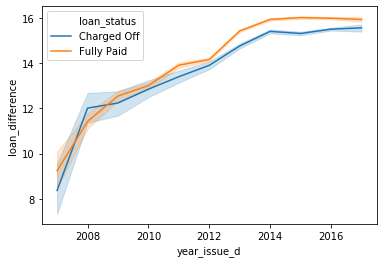

In [39]:
ax = seaborn.lineplot(x="year_issue_d", y="loan_difference", hue="loan_status",data=data_train)

In [0]:
data_train = data_train.drop(['earliest_cr_line','issue_d','last_credit_pull_d','last_pymnt_d','last_credit_pull_d','total_acc','revol_util','open_acc','inq_last_6mths'], axis=1)

In [0]:
data_test = data_test.drop(['earliest_cr_line','issue_d','last_credit_pull_d','last_pymnt_d','last_credit_pull_d','total_acc','revol_util','open_acc','inq_last_6mths'], axis=1)

In [0]:
list_float = data_train.select_dtypes(exclude=['object']).columns

In [0]:
data_train.dtypes

total_rec_prncp    float64
last_pymnt_amnt    float64
total_pymnt        float64
out_prncp          float64
total_pymnt_inv    float64
loan_amnt          float64
funded_amnt        float64
installment        float64
total_rec_int      float64
year_issue_d         int64
charged_off        float64
dtype: object

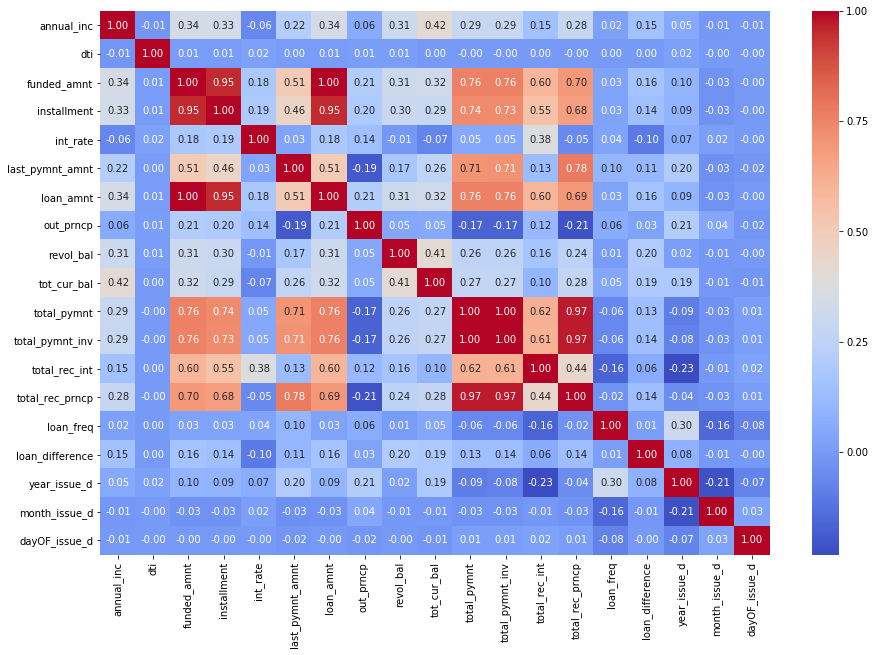

In [0]:
import matplotlib.pyplot as plt
import seaborn
fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches
cm_df = seaborn.heatmap(data_train[list_float].corr(),annot=True, fmt = ".2f", cmap = "coolwarm", ax=ax)

In [0]:
data_train['loan_status']

1009128    Charged Off
235393     Charged Off
1339142    Charged Off
1088061     Fully Paid
1267242     Fully Paid
              ...     
2026119     Fully Paid
889660      Fully Paid
1686702     Fully Paid
339192      Fully Paid
1746257     Fully Paid
Name: loan_status, Length: 548743, dtype: object

In [43]:
data_train['loan_status'].apply(lambda s: np.float(s == 'Charged Off'))

1009128    1.0
235393     1.0
1339142    1.0
1088061    0.0
1267242    0.0
          ... 
2026119    0.0
889660     0.0
1686702    0.0
339192     0.0
1746257    0.0
Name: loan_status, Length: 548743, dtype: float64

In [0]:
data_train['charged_off'] = data_train['loan_status'].apply(lambda s: np.float(s == 'Charged Off'))


In [0]:
data_train_FS = data_train

In [0]:

grade_ord_map = {'A': 1, 'B': 2, 'C': 3, 
               'D': 4, 'E': 5, 'F': 6,'G':7}

data_train_FS['gradeLabel'] = data_train_FS['grade'].map(grade_ord_map)

In [0]:

grade_ord_map = {'A': 1, 'B': 2, 'C': 3, 
               'D': 4, 'E': 5, 'F': 6,'G':7}

data_test['gradeLabel'] = data_test['grade'].map(grade_ord_map)

In [0]:

subGrade_ord_map = {'D5':45, 'C2':32, 'C5':35, 'C4':44, 'B4':24, 'E3':53, 'A4':14, 'B5':25, 'D1':41, 'A5':15, 'B3':23,
       'C3':33, 'B2':22, 'D3':43, 'D2':42, 'A3':13, 'C1':31, 'E4':54, 'E1':51, 'F2':62, 'A1':11, 'D4':44,
       'F3':63, 'B1' : 21, 'F4':64, 'A2':12, 'E2':52, 'G4':74, 'E5':55, 'F1':61, 'F5':65, 'G2':72, 'G3':73,
       'G1':71, 'G5':75}

data_train_FS['subGradeLabel'] = data_train_FS['sub_grade'].map(subGrade_ord_map)

In [0]:

subGrade_ord_map = {'D5':45, 'C2':32, 'C5':35, 'C4':44, 'B4':24, 'E3':53, 'A4':14, 'B5':25, 'D1':41, 'A5':15, 'B3':23,
       'C3':33, 'B2':22, 'D3':43, 'D2':42, 'A3':13, 'C1':31, 'E4':54, 'E1':51, 'F2':62, 'A1':11, 'D4':44,
       'F3':63, 'B1' : 21, 'F4':64, 'A2':12, 'E2':52, 'G4':74, 'E5':55, 'F1':61, 'F5':65, 'G2':72, 'G3':73,
       'G1':71, 'G5':75}

data_test['subGradeLabel'] = data_test['sub_grade'].map(subGrade_ord_map)

In [0]:

purpose_ord_map = {'debt_consolidation':1, 'home_improvement':2, 'credit_card':3,
       'major_purchase':4, 'other':14, 'house':5, 'medical':6, 'moving':7,
       'small_business':8, 'car':9, 'wedding':10, 'vacation':11, 'renewable_energy':12,
       'educational':13}

data_train_FS['purposeLabel'] = data_train_FS['purpose'].map(purpose_ord_map)

In [0]:

purpose_ord_map = {'debt_consolidation':1, 'home_improvement':2, 'credit_card':3,
       'major_purchase':4, 'other':14, 'house':5, 'medical':6, 'moving':7,
       'small_business':8, 'car':9, 'wedding':10, 'vacation':11, 'renewable_energy':12,
       'educational':13}

data_test['purposeLabel'] = data_test['purpose'].map(purpose_ord_map)

In [0]:

homeOwnership_ord_map = {'RENT':2, 'MORTGAGE':3, 'OWN':1, 'OTHER':4, 'NONE':0, 'ANY':5}

data_train_FS['homeOwnershipLabel'] = data_train_FS['home_ownership'].map(homeOwnership_ord_map)

In [0]:

homeOwnership_ord_map = {'RENT':2, 'MORTGAGE':3, 'OWN':1, 'OTHER':4, 'NONE':0, 'ANY':5}

data_test['homeOwnershipLabel'] = data_test['home_ownership'].map(homeOwnership_ord_map)

In [0]:
to_drop = ['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'purpose',
       'initial_list_status', 'application_type']
data_train_FS.drop(to_drop, inplace=True, axis=1)

In [0]:
to_drop = ['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'purpose',
       'initial_list_status', 'application_type']
data_test.drop(to_drop, inplace=True, axis=1)

In [0]:
to_drop = ['loan_status','pymnt_plan','title','state_code','state']
data_train_FS.drop(to_drop, inplace=True, axis=1)

In [0]:
to_drop = ['pymnt_plan','title','state_code','state']
data_test.drop(to_drop, inplace=True, axis=1)

In [0]:
df = data_train_FS

In [144]:
df['charged_off'].unique()

array([1., 0.])

In [0]:
from sklearn.metrics import confusion_matrix
def plot_cm(classifier, predictions):
    cm = confusion_matrix(y_test, predictions)
    
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap='RdBu')
    classNames = ['Normal','Fraud']
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), 
                     horizontalalignment='center', color='White')
    
    plt.show()
        
    tn, fp, fn, tp = cm.ravel()

    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    F1 = 2*recall*precision/(recall+precision)

    print('Recall={0:0.3f}'.format(recall),'\nPrecision={0:0.3f}'.format(precision))
    print('F1={0:0.3f}'.format(F1))

In [0]:
from sklearn.metrics import average_precision_score, precision_recall_curve
def plot_aucprc(classifier, scores):
    precision, recall, _ = precision_recall_curve(y_test, scores, pos_label=0)
    average_precision = average_precision_score(y_test, scores)

    print('Average precision-recall score: {0:0.3f}'.format(
          average_precision))

    plt.plot(recall, precision, label='area = %0.3f' % average_precision, color="green")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.legend(loc="best")
    plt.show()

In [147]:
train_data = data_train_FS.drop(columns = ['charged_off'],axis=1)
target = data_train_FS['charged_off']
train_data.shape, target.shape

((548743, 23), (548743,))

##  <a id='71'>4. Modelling</a>
<a id="modelling"></a>

Pada tahap pemodelan dilakukan:
* Feature selection menggunakan metode Random Forest
Metode Random Forest akan menunjukkan persentasi fitur dengan tingkat kepentingan suatu atribut. Fitur yang digunakan menggunakan metode ini sebesar 10 fitur. 
  * total_rec_prncp
  * last_pymnt_amnt
  * total_pymnt
  * out_prncp
  * loan_amnt
  * total_pymnt_inv
  * funded_amnt
  * installment
  * int_rate_int
  * year_issue_d
* Feature Selection menggunakan metode korelasi Heatmap.
Korelasi Heatmap merupakan pendekatan untuk mengetahui hubungan dua atribut. Nilai korelasi yang digunakan untuk memilih fitur adalah korelasi yang tinggi.

In [148]:
# Use random forest classifier for feature selection
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=25, n_estimators=100)
rfc.fit(train_data, target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=25, verbose=0,
                       warm_start=False)

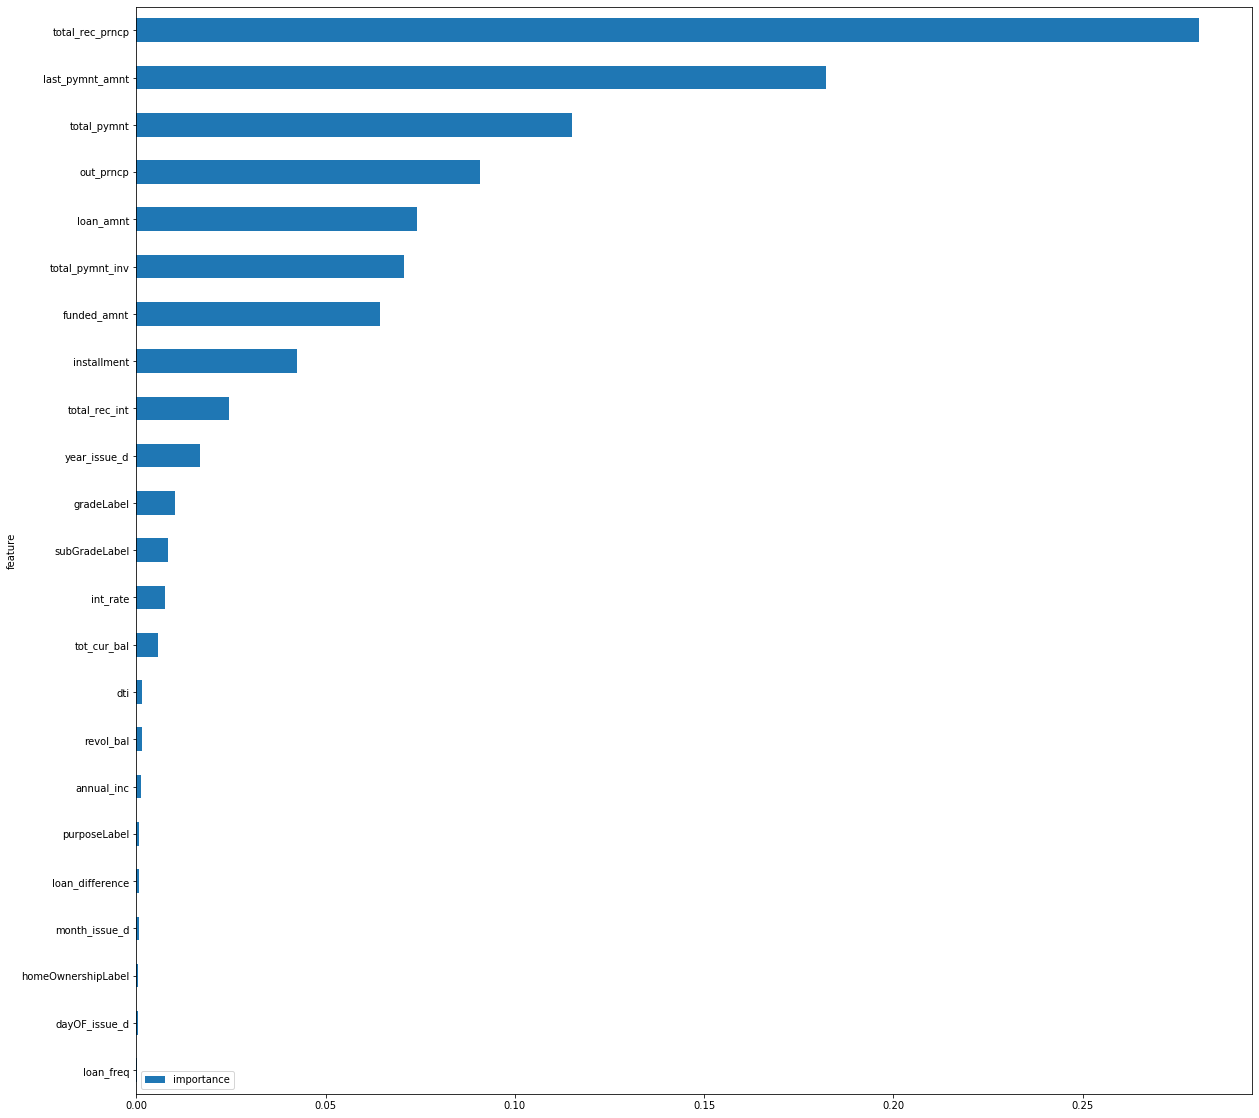

In [0]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train_data, target)
features = pd.DataFrame()
features['feature'] = train_data.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(20, 20))
plt.savefig("feature selection.png")
#plot.savefig("feature selection1.png")


In [0]:
list_float = data_train.select_dtypes(exclude=['object']).columns

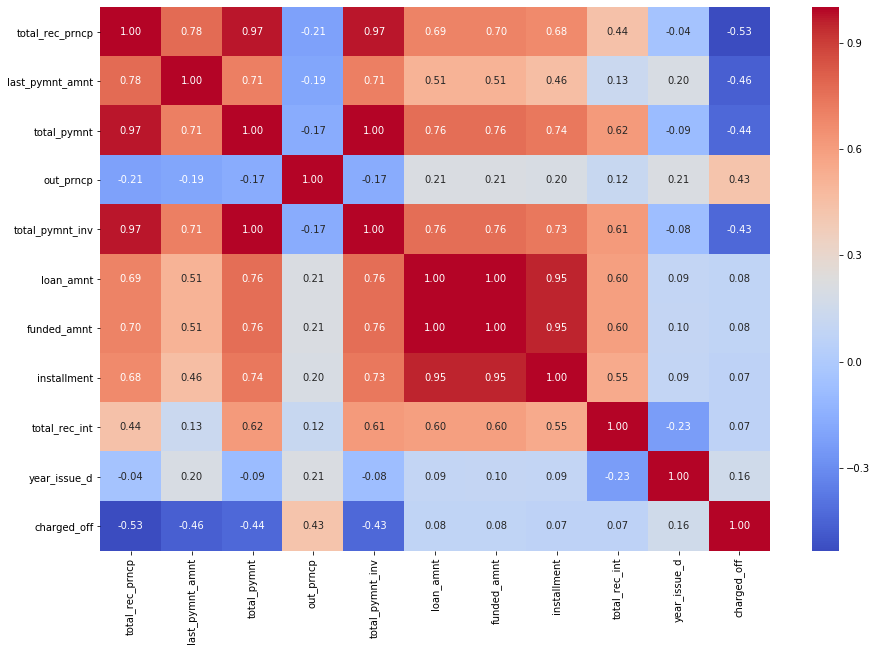

In [0]:
import matplotlib.pyplot as plt
import seaborn
fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches
cm_df = seaborn.heatmap(data_train[list_float].corr(),annot=True, fmt = ".2f", cmap = "coolwarm", ax=ax)

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


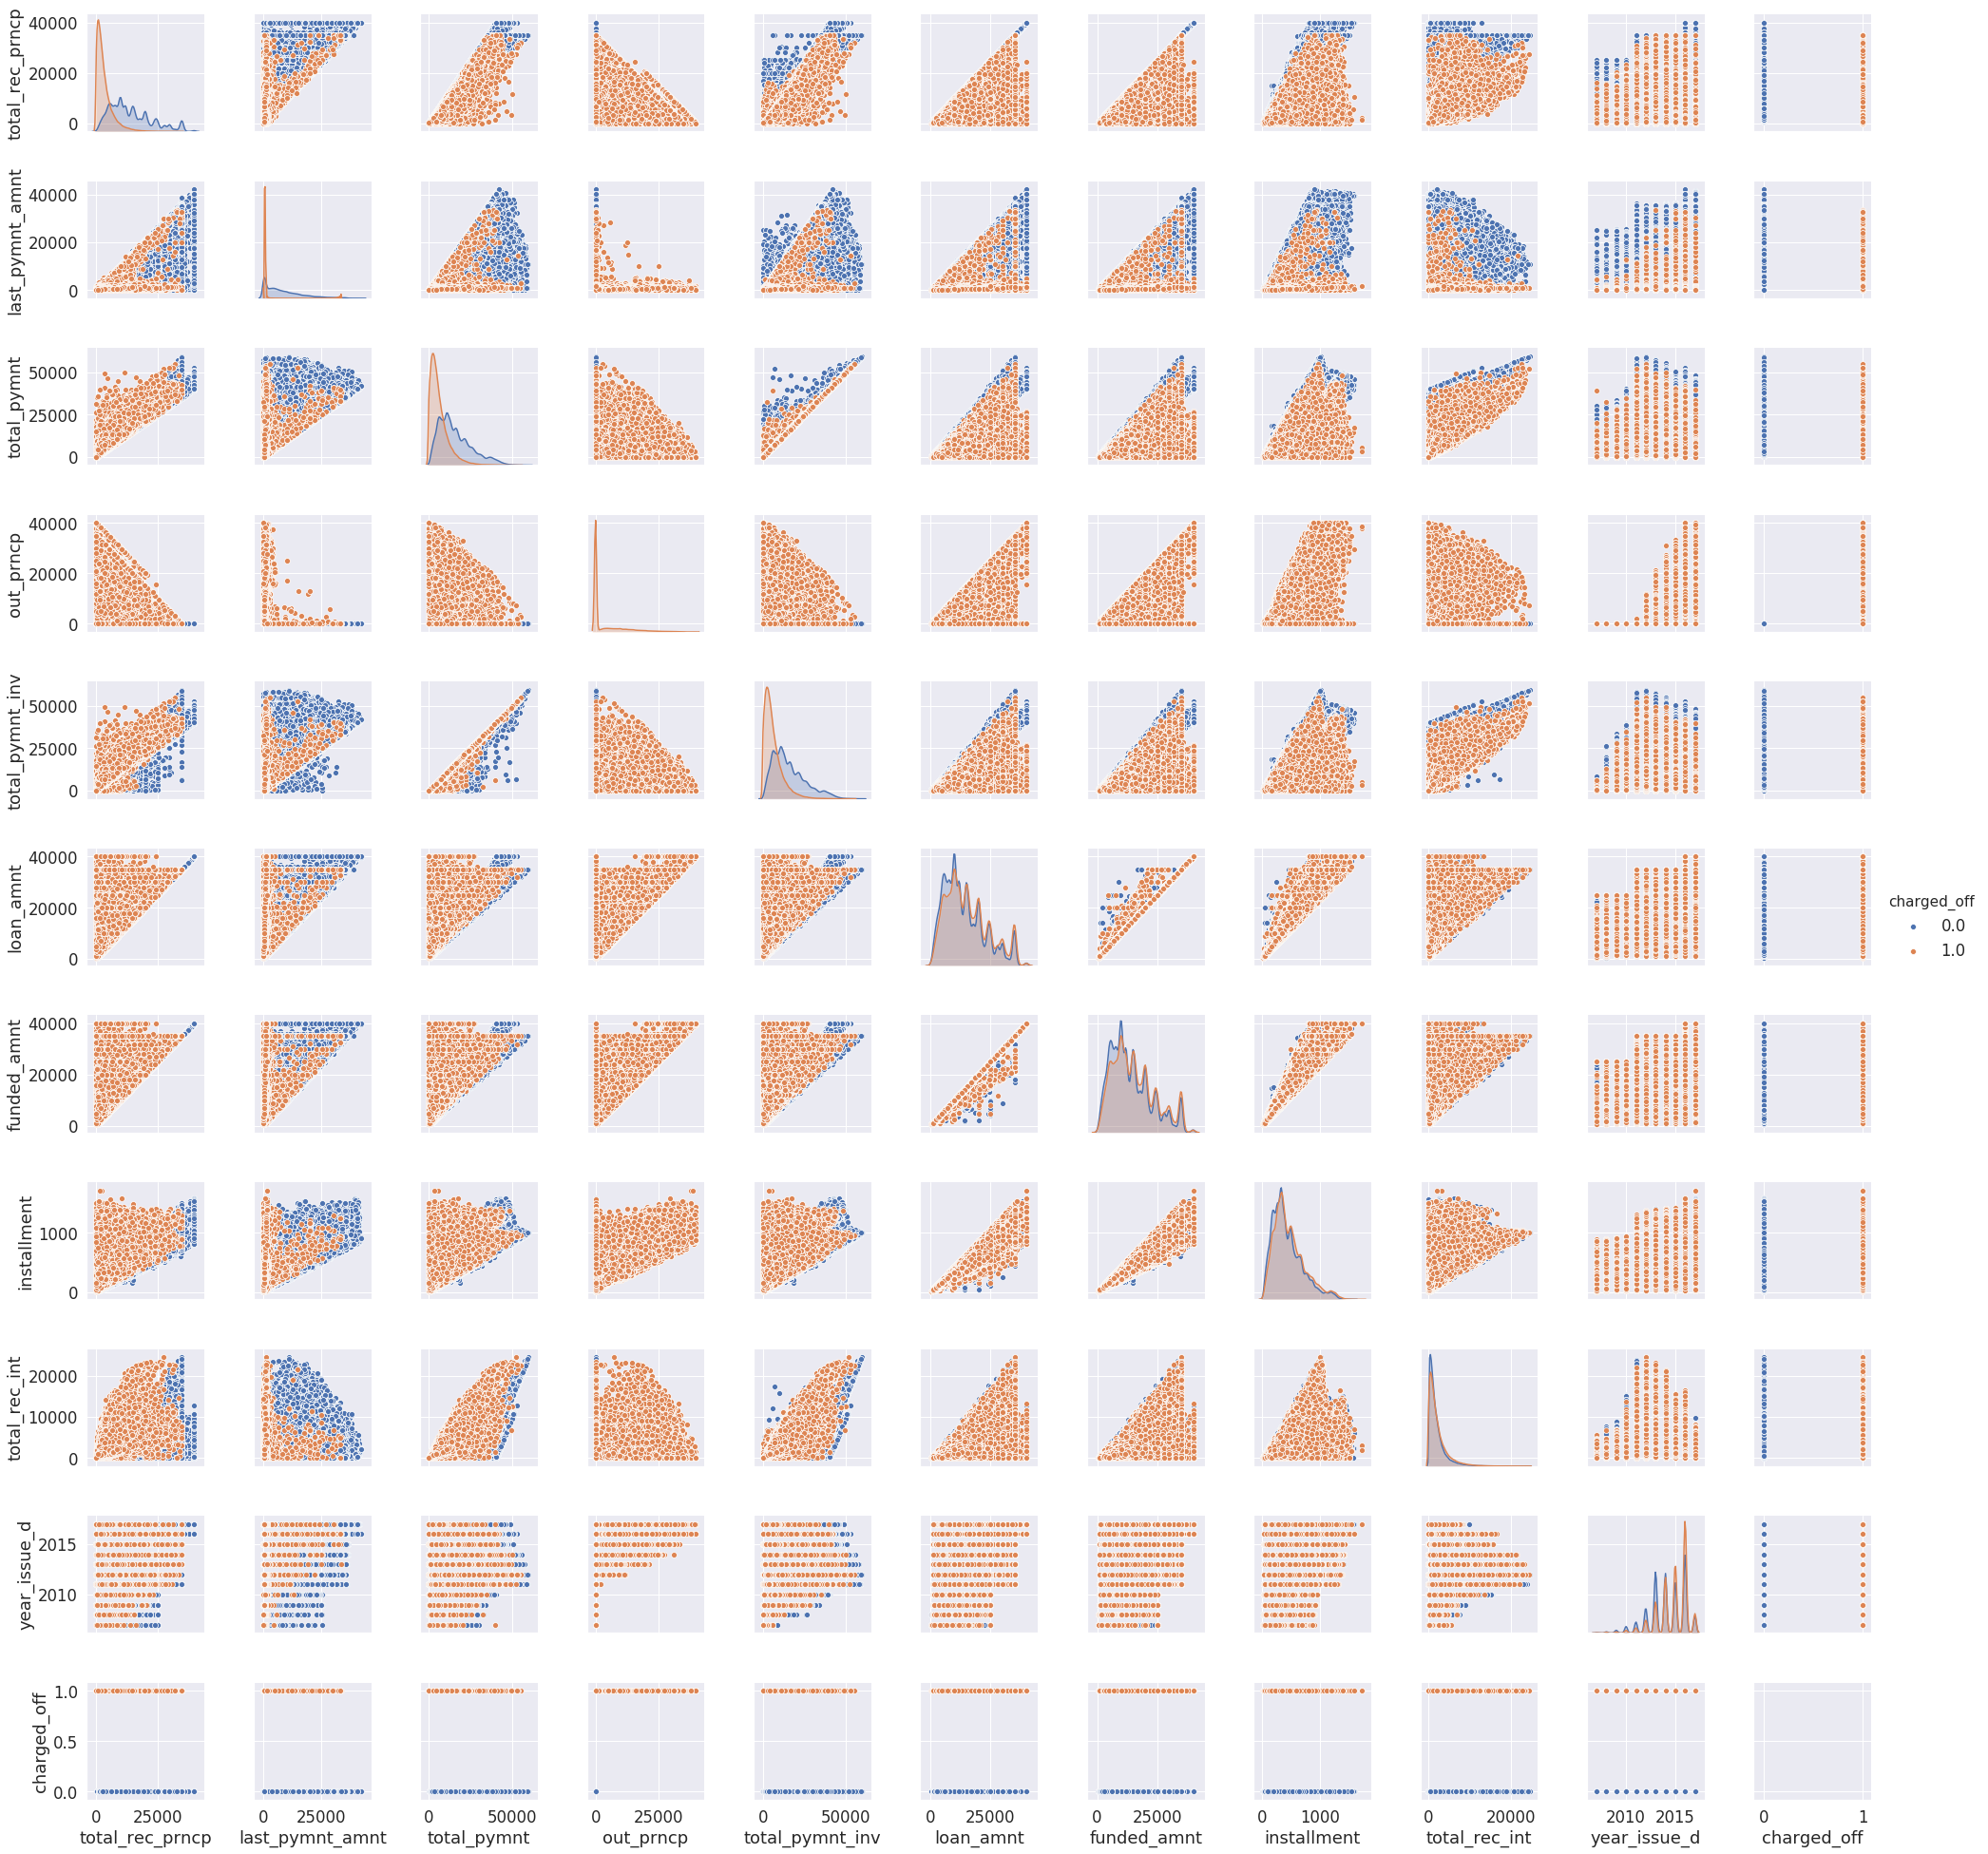

In [0]:
seaborn.set(font_scale=1.5)
seaborn.pairplot(data=data_train, hue='charged_off')
plt.show()

In [0]:
features.nlargest(10,'importance')

,importance
feature,
total_rec_prncp,0.280863
last_pymnt_amnt,0.182153
total_pymnt,0.115021
out_prncp,0.090767
loan_amnt,0.074095
total_pymnt_inv,0.070709
funded_amnt,0.064314
installment,0.042460
total_rec_int,0.024363


In [0]:
#https://www.prasetyowijaya.com/2009/02/scatter-plot.html?m=1

In [0]:
features.sort_values(by='importance', ascending=False, na_position='first')

,importance
feature,
total_rec_prncp,0.277373
last_pymnt_amnt,0.236775
total_pymnt,0.086566
out_prncp,0.078337
total_pymnt_inv,0.067796
loan_amnt,0.061402
funded_amnt,0.061366
installment,0.048626
total_rec_int,0.023010


In [0]:
features_importance = ['total_rec_prncp','last_pymnt_amnt','total_pymnt','out_prncp','total_pymnt_inv','loan_amnt',
                       'funded_amnt','installment','total_rec_int','year_issue_d','charged_off']


In [0]:
features_importance_test = ['total_rec_prncp','last_pymnt_amnt','total_pymnt','out_prncp','total_pymnt_inv','loan_amnt',
                       'funded_amnt','installment','total_rec_int','year_issue_d']


In [0]:
data_train_FS[features_importance]

,total_rec_prncp,last_pymnt_amnt,total_pymnt,out_prncp,total_pymnt_inv,loan_amnt,funded_amnt,installment,total_rec_int,year_issue_d,charged_off
1009128,3596.46,393.67,10926.910000,18903.54,10926.91,22500.0,22500.0,660.28,7297.44,2016,1.0
235393,6513.67,337.47,8928.000000,0.00,8928.00,10000.0,10000.0,337.47,1914.44,2012,1.0
1339142,1045.99,270.98,4194.530000,0.00,4194.53,8500.0,8500.0,270.98,308.91,2014,1.0
1088061,10000.00,5019.22,11433.320000,0.00,11433.32,10000.0,10000.0,340.13,1433.32,2014,0.0
1267242,18950.00,16739.42,20824.801771,0.00,20824.80,18950.0,18950.0,409.67,1874.80,2016,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2026119,6100.00,3579.30,6606.420330,0.00,6606.42,6100.0,6100.0,189.44,506.42,2016,0.0
889660,3675.00,125.02,4505.798935,0.00,4505.80,3675.0,3675.0,125.02,830.80,2013,0.0
1686702,6000.00,199.62,7186.676549,0.00,7186.68,6000.0,6000.0,199.63,1186.68,2012,0.0
339192,19200.00,15182.69,20866.285869,0.00,20866.29,19200.0,19200.0,632.87,1666.29,2016,0.0


In [0]:
data_train = data_train_FS[features_importance]
data_test = data_test[features_importance_test]

In [0]:
df = data_train

In [151]:
from sklearn.utils import resample

# Separate input features and target
y = df.charged_off
X = df.drop('charged_off', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_fraud = X[X.charged_off==0]
fraud = X[X.charged_off==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled.charged_off.value_counts()
   

1.0    297493
0.0    297493
Name: charged_off, dtype: int64

#### Membangun Model Klasifikasi
Membangun model klasifikasi menggunakan Algoritma XGBoost untuk menentukan apakah peminjam itu Good atau Bad Customer. Fitur yang digunakan pada model klasifikasi adalah fitur yang dihasilkan menggunakan Random Forest.
* 0 merupakan Good Customer
* 1 mmerupakan Bad Customer


In [152]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 42, n_jobs = -1)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

##  <a id='71'>5. Evaluation</a>
<a id="evaluation"></a>

Tahap Evaluasi menggunakan confusion matrix dan ROC curve

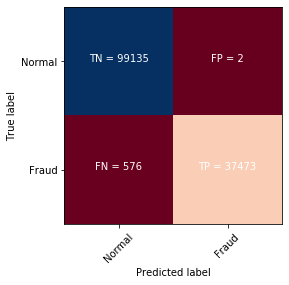

Recall=0.985 
Precision=1.000
F1=0.992
Average precision-recall score: 0.999


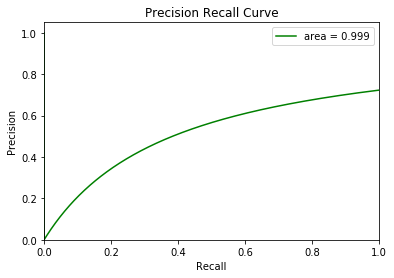

In [153]:
#Make predictions
y_pred = xgb.predict(X_test)
try:
    scores = xgb.decision_function(X_test)
except:
    scores = xgb.predict_proba(X_test)[:,1]
#Make plots
y_pred = xgb.predict(X_test)
plot_cm(xgb, y_pred)
plot_aucprc(xgb, scores)

##  <a id='71'>6. Deployment</a>
<a id="deployment"></a>

Tahap Deployment dilakukan dengan melakukan pengujian terhadap model yang dihasilkan di tahap pemodelan klasifikasi menggunakan XGBoost berdasarkan data test.

In [0]:

y_pred_t = xgb.predict(data_test)


In [0]:
data_test['predictions'] = xgb.predict(data_test)

In [156]:
data_test.head()

,total_rec_prncp,last_pymnt_amnt,total_pymnt,out_prncp,total_pymnt_inv,loan_amnt,funded_amnt,installment,total_rec_int,year_issue_d,predictions
10,12000.00,418.47,13739.329992,0.0,13710.71,12000.0,12000.0,381.04,1720.28,2011,0.0
13,2381.46,105.00,4200.000000,0.0,4200.00,4200.0,4200.0,105.00,1807.62,2011,1.0
16,2508.54,344.20,3097.800000,0.0,3097.80,11000.0,11000.0,344.20,585.66,2011,1.0
22,2250.00,80.89,2748.320000,0.0,2748.32,2250.0,2250.0,76.35,498.32,2011,0.0
26,2782.12,224.51,3620.060000,0.0,3620.06,7175.0,7175.0,224.51,581.78,2011,1.0


In [157]:
data_test.predictions.value_counts()

0.0    133072
1.0     50008
Name: predictions, dtype: int64

Grafik dibawah ini menunjukkan bahwa data peminjam yang digunakan dalam dataset ini lebih banyak Good Customer

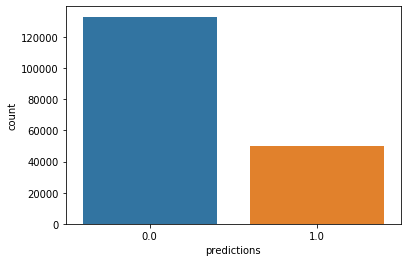

In [158]:
ax = seaborn.countplot(x="predictions", data=data_test)

In [0]:
data_test.to_csv("data_test_result_subbmission.csv")